In [1]:
!pip install tensorflow

  Using cached tensorflow-2.16.2-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.16.2-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0.tar.gz (27 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.64.1-cp311-cp311-win_amd64.whl.meta

In [26]:
#importing libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from pathlib import Path
import random

In [27]:
#load data
data_path = "/Users/Awurakua Asiedu/Desktop/blossom_notes/mlp-cnn/RETINOPATHY/Diabetic_Retinopathy/train"
classes = os.listdir(data_path)
print (classes)

['DR', 'No_DR']


In [28]:
# Load images and labels
def load_data(data_path):
    images = []
    labels = []
    for label, category in enumerate(classes):
        category_path = Path(data_path) / category
        for image_path in category_path.glob('*.jpg'):
            img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)


In [29]:
X, y = load_data(data_path)
print(f'Total images: {len(X)}, Total labels: {len(y)}')

Total images: 2076, Total labels: 2076


In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [31]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

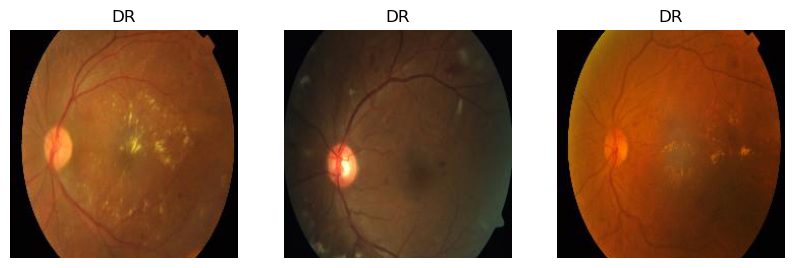

In [47]:
# Identify the class label for DR
DR_label = 0

# Filter images belonging to the DR class
DR_indices = np.where(y_train == DR_label)[0]

plt.figure(figsize=(10, 10))
for i in range(3):
  ax = plt.subplot(1, 3, i + 1)
  plt.imshow(X_train[DR_indices[i]])
  plt.title("DR")
  plt.axis("off")

plt.show()

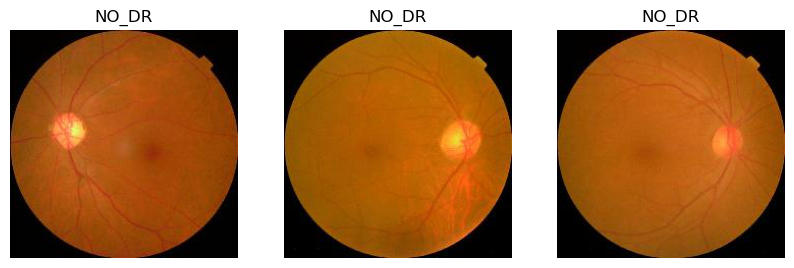

In [48]:
# Identify the class label for NO_DR
NO_DR_label = 1

# Filter images belonging to the NO_DR class
NO_DR_indices = np.where(y_train == NO_DR_label)[0]


plt.figure(figsize=(10, 10))
for i in range(3):
  ax = plt.subplot(1, 3, i + 1)
  plt.imshow(X_train[NO_DR_indices[i]])
  plt.title("NO_DR")
  plt.axis("off")
plt.show()


In [49]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

In [50]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:
# Train the model
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5853 - loss: 2.1339 - val_accuracy: 0.9290 - val_loss: 0.2274
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9217 - loss: 0.2153 - val_accuracy: 0.9146 - val_loss: 0.2315
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.9245 - loss: 0.2100 - val_accuracy: 0.9350 - val_loss: 0.1812
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.9418 - loss: 0.2013 - val_accuracy: 0.9302 - val_loss: 0.1770
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.9475 - loss: 0.1762 - val_accuracy: 0.9338 - val_loss: 0.1726
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.9563 - loss: 0.1527 - val_accuracy: 0.9374 - val_loss: 0.1699
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.9459 - loss: 0.1618 - val_accuracy: 0.9290 - val_loss: 0.2120
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.9538 - loss: 0.1593 - val_accuracy: 0.9422 - val_loss:

In [55]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

26/26 - 11s - 437ms/step - accuracy: 0.9338 - loss: 0.1885
Test accuracy: 0.9338147044181824


In [56]:
# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
print(f'Test accuracy: {test_acc}')

39/39 - 17s - 441ms/step - accuracy: 0.9534 - loss: 0.1360
Test accuracy: 0.9338147044181824


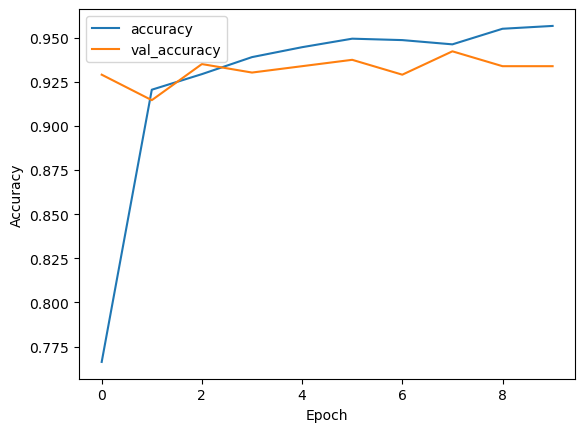

In [57]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()